# This Notebook contains plot 10b

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from ast import literal_eval as make_tuple
from scipy.integrate import quad
import magpylib as mp
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import shutil

Train Data air_newpcb Box: mar_13_4channel_air_newpcb. Test Data new_pork Box:mar_13_4channel_pork_newpcb

In [18]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

# Read the data
file_path = "/ProjectEspana/oldpcbairbr/"
channel1_mat  = np.zeros((10, 10))  # Low Peak Channel 1
channel2_mat  = np.zeros((10, 10))  #High Peak Channel 1
channel3_mat  = np.zeros((10, 10))  #Low Peak Channel 2
channel4_mat  = np.zeros((10, 10)) #High Peak Channel 2

for files in glob.glob(file_path+"*"):
    single_file = files.split("/")[-1]
    info_list = single_file.split("_")
    #print(info_list)
    channel_value = info_list[1]
    coordinate = info_list[0]
    coordinate = make_tuple(coordinate)
    x = int(coordinate[0]/10)
    y = int(coordinate[1]/10)
    signal = read_complex_binary2(files)
    transformed_fft_sig = np.abs(np.fft.fftshift(np.fft.fft(signal[0:8000000])))
    #peak1 = np.max(transformed_fft_sig[1340000:1370000])
    #peak2 = np.max(transformed_fft_sig[1540000:1570000])
    sig1 = transformed_fft_sig[1340000:1370000]
    sig2 = transformed_fft_sig[1540000:1570000]    
    peak1 = np.mean(sig1[np.argsort(sig1)[-10:]])
    peak2 = np.mean(sig2[np.argsort(sig2)[-10:]])
    if channel_value == "a":
        channel1_mat[x][y] = peak1
        channel2_mat[x][y] = peak2
    elif channel_value == "b":
        channel3_mat[x][y] = peak1
        channel4_mat[x][y] = peak2
print("DONE Processing")

DONE Processing


In [19]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

# Read the data
file_path = "/ProjectEspana/old_pcb_pork_lifted_less/"
test_channel1  = np.zeros((10, 10))  # Low Peak Channel 1
test_channel2  = np.zeros((10, 10))  #High Peak Channel 1
test_channel3  = np.zeros((10, 10))  #Low Peak Channel 2
test_channel4  = np.zeros((10, 10)) #High Peak Channel 2

for files in glob.glob(file_path+"*"):
    single_file = files.split("/")[-1]
    info_list = single_file.split("_")
    #print(info_list)
    channel_value = info_list[1]
    coordinate = info_list[0]
    coordinate = make_tuple(coordinate)
    x = int(coordinate[0]/10)
    y = int(coordinate[1]/10)
    signal = read_complex_binary2(files)
    transformed_fft_sig = np.abs(np.fft.fftshift(np.fft.fft(signal[0:8000000])))
    #peak1 = np.max(transformed_fft_sig[1340000:1370000])
    #peak2 = np.max(transformed_fft_sig[1540000:1570000])
    sig1 = transformed_fft_sig[1340000:1370000]
    sig2 = transformed_fft_sig[1540000:1570000]    
    peak1 = np.mean(sig1[np.argsort(sig1)[-10:]])
    peak2 = np.mean(sig2[np.argsort(sig2)[-10:]])
    if channel_value == "a":
        test_channel1[x][y] = peak1
        test_channel2[x][y] = peak2
    elif channel_value == "b":
        test_channel3[x][y] = peak1
        test_channel4[x][y] = peak2
print("DONE Processing")

DONE Processing


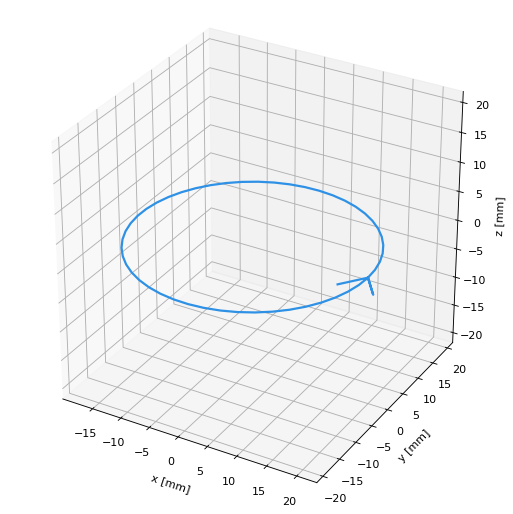

In [20]:
current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
mp.show(current_loop)
B=np.zeros((40,40,20,3),dtype=float)
for i in range(-200,200,10):
    for j in range(-200,200,10):
        for k in range(50,250,10):
            B[i//10+20,j//10+20,k//10-5]=current_loop.getB((i,j,k))

def get_signal_strength(x,c1,c2,c3,c4,c5,c6,k):
    print(x)
    x,y = x
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B1=current_loop.getB((10*x+c2,c3,c1 - 10*y))[2]
    B2=current_loop.getB((10*x+c5,c6,c4 - 10*y))[2]
    return np.abs(B1*B2)*10**k

def get_B1test(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B1=current_loop.getB((10*y + 87.3 -170, 0.68+16.1 ,-250 + 83.9 + 10*x))[2]
    return B1

def get_B2test(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B2=current_loop.getB((10*y + 87.3 -80, 0.68+16.1 , 83.9 + 10*x))[2]
    return B2

def get_B3test(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B3=current_loop.getB((10*y + 87.3 -80, 0.68+16.1 , -250 + 83.9 + 10*x))[2]
    return B3

def get_B4test(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B4=current_loop.getB((10*y + 87.3 - 170, 0.68+16.1 , 10*x + 83.9))[2]
    return B4

def get_signal_test(channel, coordinates,k):
    if channel == 0:
        BA = get_B1test(coordinates)
        BB = get_B3test(coordinates)
    elif channel == 1:
        BA = get_B1test(coordinates)
        BB = get_B4test(coordinates)
    elif channel == 2:
        BA = get_B2test(coordinates)
        BB = get_B3test(coordinates)
    elif channel == 3:
        BA = get_B2test(coordinates)
        BB = get_B4test(coordinates)

    return np.abs(BA * BB)*10**k




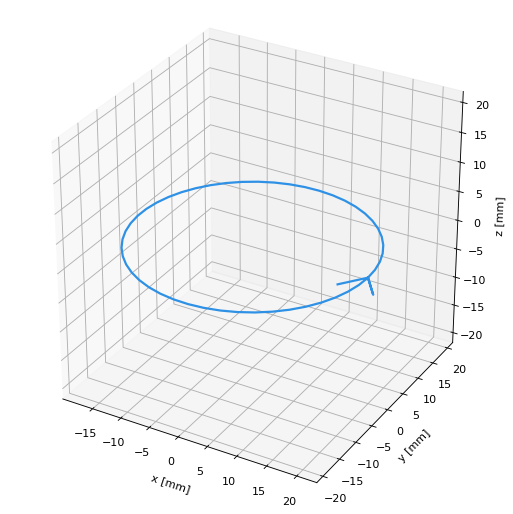

In [21]:
current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
mp.show(current_loop)
B=np.zeros((40,40,20,3),dtype=float)
for i in range(-200,200,10):
    for j in range(-200,200,10):
        for k in range(50,250,10):
            B[i//10+20,j//10+20,k//10-5]=current_loop.getB((i,j,k))

def get_signal_strength(x,c1,c2,c3,c4,c5,c6,k):
    print(x)
    x,y = x
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B1=current_loop.getB((10*x+c2,c3,c1 - 10*y))[2]
    B2=current_loop.getB((10*x+c5,c6,c4 - 10*y))[2]
    return np.abs(B1*B2)*10**k

def get_B1(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B1=current_loop.getB((10*y + 87.3 -170, 0.68 ,-250 + 83.9 + 10*x))[2]
    return B1

def get_B2(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B2=current_loop.getB((10*y + 87.3 -80, 0.68 , 83.9 + 10*x))[2]
    return B2

def get_B3(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B3=current_loop.getB((10*y + 87.3 -80, 0.68 , -250 + 83.9 + 10*x))[2]
    return B3

def get_B4(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B4=current_loop.getB((10*y + 87.3 - 170, 0.68 , 10*x + 83.9))[2]
    return B4

def get_signal_new(channel, coordinates,k):
    if channel == 0:
        BA = get_B1(coordinates)
        BB = get_B3(coordinates)
    elif channel == 1:
        BA = get_B1(coordinates)
        BB = get_B4(coordinates)
    elif channel == 2:
        BA = get_B2(coordinates)
        BB = get_B3(coordinates)
    elif channel == 3:
        BA = get_B2(coordinates)
        BB = get_B4(coordinates)

    return np.abs(BA * BB)*10**k
# current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
# mp.show(current_loop)
# B=np.zeros((40,40,20,3),dtype=float)
# for i in range(-200,200,10):
#     for j in range(-200,200,10):
#         for k in range(50,250,10):
#             B[i//10+20,j//10+20,k//10-5]=current_loop.getB((i,j,k))

# def get_signal_strength(x,c1,c2,c3,c4,c5,c6,k):
#     print(x)
#     x,y = x
#     current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
#     B1=current_loop.getB((10*x+c2,c3,c1 - 10*y))[2]
#     B2=current_loop.getB((10*x+c5,c6,c4 - 10*y))[2]
#     return np.abs(B1*B2)*10**k

# def get_B1(coordinates):
#     x,y = coordinates
#     current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
#     B1=current_loop.getB((-90.6+10*y, -0.8 ,250 - 83.8 - 10*x))[2]
#     return B1

# def get_B2(coordinates):
#     x,y = coordinates
#     current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
#     B2=current_loop.getB((10*y - 0.6, -0.8 , 83.8 + 10*x))[2]
#     return B2

# def get_B3(coordinates):
#     x,y = coordinates
#     current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
#     B3=current_loop.getB((10*y - 0.6, -0.8 , 250 - 83.8 - 10*x))[2]
#     return B3

# def get_B4(coordinates):
#     x,y = coordinates
#     current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
#     B4=current_loop.getB((10*y - 90.6, -0.8 , 10*x + 83.8))[2]
#     return B4

# def get_signal_new(channel, coordinates,k):
#     if channel == 0:
#         BA = get_B1(coordinates)
#         BB = get_B3(coordinates)
#     elif channel == 1:
#         BA = get_B1(coordinates)
#         BB = get_B4(coordinates)
#     elif channel == 2:
#         BA = get_B2(coordinates)
#         BB = get_B3(coordinates)
#     elif channel == 3:
#         BA = get_B2(coordinates)
#         BB = get_B4(coordinates)

#     return np.abs(BA * BB)*10**k

In [22]:
def plot_field(matrix):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    x = np.arange(0,10,1)
    y = np.arange(0,10,1)
    X, Y = np.meshgrid(x, y)
    Z = matrix
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('RSSI');
    plt.pause(1)
    plt.close(fig)

Calibrate K Value

In [23]:
k_params = [np.log10(channel3_mat)[5,5] - np.log10(get_signal_new(0,(5,5),0)),
np.log10(channel1_mat)[5,5] - np.log10(get_signal_new(1,(5,5),0)),
np.log10(channel4_mat)[5,5] - np.log10(get_signal_new(2,(5,5),0)),
np.log10(channel2_mat)[5,5] - np.log10(get_signal_new(3,(5,5),0))]

In [24]:
X_Features = []
Y_Labels = []
x = np.arange(0,10,.1)
y = np.arange(0,10,.1)
for x_index in x:
    for y_index in y:
        Y_Labels.append([x_index,y_index])
        feature_ray = []
        # feature_ray.append(get_signal_new(0,(x_index,y_index),k_params[0]))
        # feature_ray.append(get_signal_new(3,(x_index,y_index),k_params[3]))
        for chan in range(0,4):
            feature_ray.append(np.log10(get_signal_test(chan,(x_index,y_index),k_params[chan])))
        X_Features.append(feature_ray)

analytical_modal = KNeighborsRegressor(n_neighbors=3)
analytical_modal.fit(X_Features,Y_Labels)

KNeighborsRegressor(n_neighbors=3)

In [25]:
error_mat = np.zeros((10,10))
error_mat_x, error_mat_y=np.zeros((5,5)),np.zeros((5,5))
for i in range(0,10):
    for j in range(0,10):
        X_pred = [np.log10(test_channel3[i,j]),np.log10(test_channel1[i,j]),np.log10(test_channel4[i,j]),np.log10(test_channel2[i,j])]
        #X_pred = [test_channel3[i,j],test_channel2[i,j]]
        y=[i,j]
        x,y = analytical_modal.predict([X_pred])[0]
        error_mat[int(i),int(j)] = np.sqrt((x-i)**2 + (y-j)**2)
        #error_mat_x[int(i/2),int(j/2)] = x-i
        #error_mat_y[int(i/2),int(j/2)] = y-j
        # print("prediction",x,y)
        # print("actual",i,j)
# plt.imshow(error_mat)
# print(np.median(error_mat))
# print(np.mean(error_mat))
# plt.colorbar()

In [26]:
X_Features = []
Y_Labels = []
channel_meas= [channel3_mat,channel1_mat,channel4_mat,channel2_mat]
x = np.arange(0,10,1)
y = np.arange(0,10,1)
for x_index in x:
    for y_index in y:
        Y_Labels.append([x_index,y_index])
        feature_ray = []
        for chan in range(0,4):
            feature_ray.append(np.log10(channel_meas[chan][x_index,y_index]))
        X_Features.append(feature_ray)
print(len(X_Features))
print(len(Y_Labels))

100
100


Train Lookup Table Baseline

In [27]:
error_mat_lu = np.zeros((10,10))
 
lutable = KNeighborsRegressor(n_neighbors=min(3,len(X_Features)))
lutable.fit(X_Features,Y_Labels)

error_mat_lu = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        X_pred = [np.log10(test_channel3[i,j]),np.log10(test_channel1[i,j]),np.log10(test_channel4[i,j]),np.log10(test_channel2[i,j])]
        x,y = lutable.predict([X_pred])[0]
        error_mat_lu[i,j] = np.sqrt((x-i)**2 + (y-j)**2)



Train Perceptron Baseline

In [28]:
perceptron = MLPRegressor(hidden_layer_sizes=(16,32,16),max_iter = 1000,random_state=50)
perceptron.fit(X_Features,Y_Labels)

error_mat_perceptron = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        X_pred = [np.log10(test_channel3[i,j]),np.log10(test_channel1[i,j]),np.log10(test_channel4[i,j]),np.log10(test_channel2[i,j])]
        x,y = perceptron.predict([X_pred])[0]
        error_mat_perceptron[i,j] = np.sqrt((x-i)**2 + (y-j)**2)

In [29]:
print(np.median(error_mat_perceptron))
np.median(error_mat_lu)

0.5096044672286177


0.7453559924999298

Plot Curves

Text(0, 0.5, 'CDF')

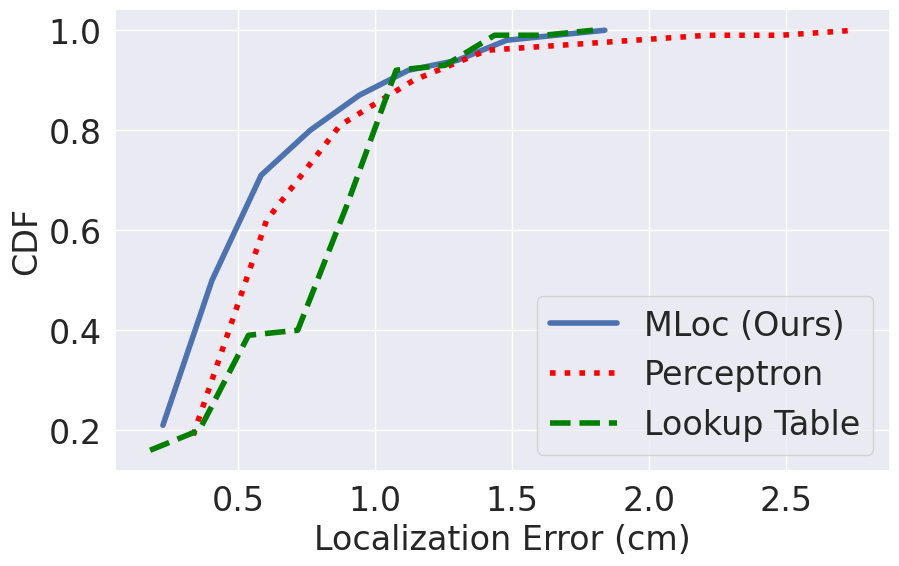

In [30]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(10,6))
counts, bin_edges = np.histogram (error_mat, bins=10, density=True)
cdf = np.cumsum (counts)
ax.plot (bin_edges[1:],cdf/cdf[-1],linewidth=4,label='MLoc (Ours)')
counts, bin_edges = np.histogram (error_mat_perceptron, bins=10, density=True)
cdf = np.cumsum (counts)
ax.plot (bin_edges[1:],cdf/cdf[-1],linewidth=4, linestyle = "dotted", label='Perceptron',color='red')
counts, bin_edges = np.histogram (error_mat_lu, bins=10, density=True)
cdf = np.cumsum (counts)
ax.plot (bin_edges[1:],cdf/cdf[-1],linewidth=4,linestyle= "dashed", label='Lookup Table', color='green')
ax.tick_params(axis='both', which='major',labelsize=24)
ax.legend(fontsize=24, loc='lower right')
ax.set_xlabel('Localization Error (cm)',fontsize=24)
ax.set_ylabel('CDF',fontsize=24)